# Fake News Detection Project

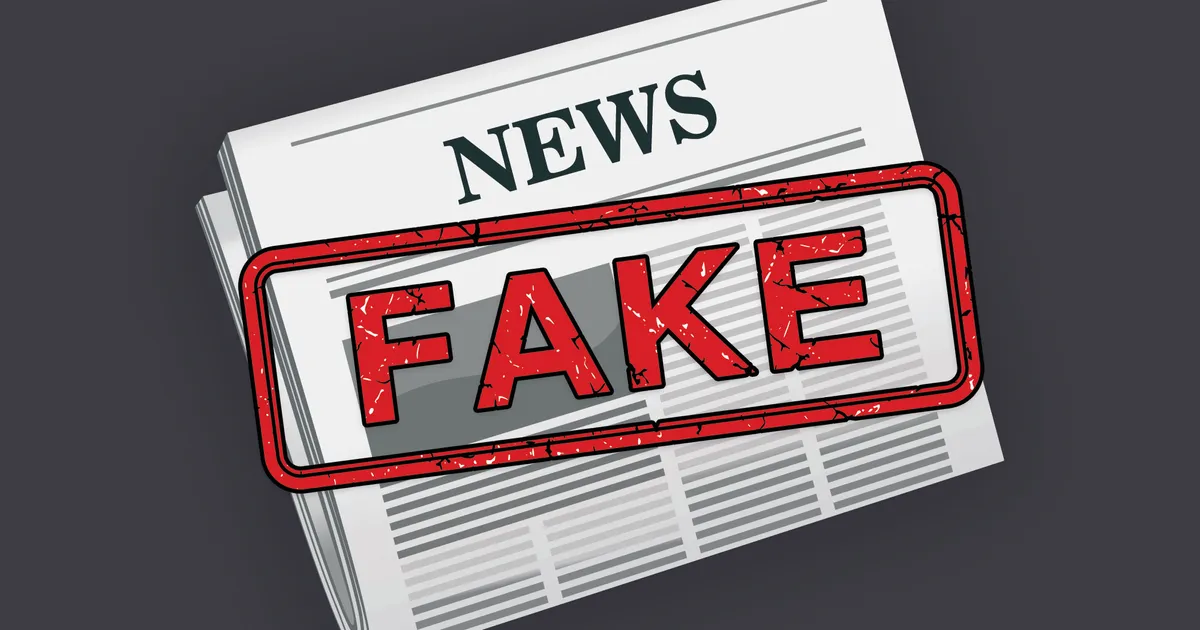

## Understanding Fake News





**What is Fake News:**


Fake news is a type of misinformation that involves the intentional creation and dissemination of misleading or false 
information, often presented as factual news. It encompasses a wide range of deceptive practices, such as the circulation of 
fabricated stories, distorted content, misleading headlines, and manipulated multimedia elements, with the aim of misleading or 
deceiving the public. Fake news can proliferate through various channels, including websites, social media platforms, and even 
traditional news outlets, making it a complex and pressing issue.



**The Importance of Detecting Fake News:**
    
    
Detecting and combating fake news is of paramount importance for a multitude of reasons. First and foremost, it plays a pivotal role in maintaining trust in reliable sources of information, such as legitimate news organizations. The spread of fake news can erode the credibility of journalism, which is a cornerstone of informed and democratic societies.

Furthermore, fake news can have far-reaching societal and political impacts. It has the potential to influence public opinion, elections, and contribute to social and political unrest. It can exacerbate existing societal divisions and biases. Additionally, fake news poses safety and health risks, especially during critical events such as health crises. Misinformation regarding health, safety, or emergencies can have life-threatening consequences.

Moreover, the economic consequences of fake news cannot be understated. Businesses can suffer reputational and financial harm when they inadvertently become conduits for fake news. By detecting fake news, we not only protect businesses but also uphold the quality and integrity of the information environment, allowing individuals to make informed decisions based on factual and reliable information.



## Our Project



In this Jupyter notebook, we embark on a journey to explore the detection of fake news using machine learning techniques. Our objective is to develop a model capable of distinguishing between authentic news articles and their counterfeit counterparts. This project represents a convergence of data analysis, text processing, and machine learning methodologies to address the pressing issue of fake news in a data-driven and systematic manner. Let's dive into the code and techniques designed to tackle this important problem.

### Importing Libraries

In [5]:
    import pandas as pd  
    import numpy as np  
    import seaborn as sns  
    import matplotlib.pyplot as plt    
    from sklearn.metrics import accuracy_score  
    from sklearn.metrics import classification_report  
    import re  
    import string  

### Importing Dataset

In [6]:
dataframe_fake = pd.read_csv("Fake.csv")  
dataframe_true = pd.read_csv("True.csv") 

In [7]:
dataframe_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
dataframe_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Data Preprocessing 

In [9]:
# Adding an extra column 'class' in the given dataset stating weather news is true or false

dataframe_fake["class"] = 0  
dataframe_true["class"] = 1 

In [10]:
# Checking the shape of data set 

dataframe_fake.shape, dataframe_true.shape 

((23481, 5), (21417, 5))

In [11]:
# Deleting last 10 rows from both data set for manual testing at last

dataframe_fake_manual_testing = dataframe_fake.tail(10)  
for i in range(23480,23470,-1):  
    dataframe_fake.drop([i], axis = 0, inplace = True)  
     
dataframe_true_manual_testing = dataframe_true.tail(10)  
for i in range(21416,21406,-1):  
    dataframe_true.drop([i], axis = 0, inplace = True)  

In [12]:
# Let's have a look at the change in the shape of both the dataset  

dataframe_fake.shape, dataframe_true.shape 

((23471, 5), (21407, 5))

In [13]:
# Againg adding extra column 'class' in manual testing dataset 

dataframe_fake_manual_testing["class"] = 0  
dataframe_true_manual_testing["class"] = 1  

C:\Users\masan\AppData\Local\Temp\ipykernel_19796\805801564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_fake_manual_testing["class"] = 0
C:\Users\masan\AppData\Local\Temp\ipykernel_19796\805801564.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_true_manual_testing["class"] = 1


In [14]:
dataframe_fake_manual_testing.head(10) 

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [15]:
  dataframe_true_manual_testing.head(10) 

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [16]:
# Merging both dataset into a single dataset 

dataframe_merge = pd.concat([dataframe_fake, dataframe_true], axis =0 )  
dataframe_merge.head(10)  

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [17]:
# Dropping columns which are not necessary for model building 

dataframe = dataframe_merge.drop(["title", "subject","date"], axis = 1) 

In [18]:
# Checking for null values

dataframe.isnull().sum() 

text     0
class    0
dtype: int64

In [19]:
# Shuffling the rows so that there should be randomly fake and true  news in dataset

dataframe = dataframe.sample(frac = 1)  
dataframe.head() 

,text,class
10409,"More than 21,000 people from all regions of th...",0
15276,As if this presidential race couldn t get any ...,0
17914,TOKYO (Reuters) - A district court in Fukushim...,1
21180,There are two small problems with your analogy...,0
21522,"Hmmm .If we didn t know better, we d almost th...",0


In [20]:
# Reseting index of dataset 

dataframe.reset_index(inplace = True)  
dataframe.drop(["index"], axis = 1, inplace = True)  
dataframe.head()

,text,class
0,"More than 21,000 people from all regions of th...",0
1,As if this presidential race couldn t get any ...,0
2,TOKYO (Reuters) - A district court in Fukushim...,1
3,There are two small problems with your analogy...,0
4,"Hmmm .If we didn t know better, we d almost th...",0


In [21]:
# Creating funciton for removing all charectors from text in dataset. 
#It process the text so that it is understandable to the algorithm

def wordopt(text):  
    text = text.lower()  
    text = re.sub('\[.*?\]', '', text)  
    text = re.sub("\\W"," ", text)  
    text = re.sub('https?://\S+|www\.\S+', '', text)  
    text = re.sub('<.*?>+', '', text)  
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  
    text = re.sub('\n', '', text)  
    text = re.sub('\w*\d\w*', '', text)      
    return text  

In [22]:
# Applying wordopt function to dataset

dataframe["text"] = dataframe["text"].apply(wordopt) 

In [23]:
# Creating x and y variable for training model

x = dataframe["text"]  
y = dataframe["class"] 

In [24]:
# Splitting dataset into training and testing dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) 

In [25]:
# Converting data from text into vectors so that it will be simple for algorithms to analyze numerical data and proccess it.

from sklearn.feature_extraction.text import TfidfVectorizer  
      
      
vectorization = TfidfVectorizer()  
xv_train = vectorization.fit_transform(x_train)  
xv_test = vectorization.transform(x_test)  

## Buiding Models

### Logestic Regressiong Model

In [26]:
# Importing 'LogisticRegression' class
from sklearn.linear_model import LogisticRegression  
  
# Building model    
LR_classifier = LogisticRegression() 
# Training model on given dataset
LR_classifier.fit(xv_train,y_train) 

LogisticRegression()

In [27]:
# Making predictions from trained model 
pred_lr = LR_classifier.predict(xv_test)
# Testing accuracy of the model 
accuracy_score(y_test, pred_lr)  

0.9872549019607844

In [28]:
# Printing accuracy report 
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5858
           1       0.99      0.99      0.99      5362

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Decision Tree classifier

In [29]:
# Importing 'DecisionTreeClassifier' class
from sklearn.tree import DecisionTreeClassifier  
      

# Making model    
DT_Classifier = DecisionTreeClassifier()
# Training model on given dataset 
DT_Classifier.fit(xv_train, y_train)  

DecisionTreeClassifier()

In [30]:
# Making predictions from traine model 
pred_dt = DT_Classifier.predict(xv_test)
# Testing accuracy of model 
accuracy_score(y_test, pred_dt) 

0.9950980392156863

In [31]:
# Printing classification report 
print(classification_report(y_test, pred_dt))  

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5858
           1       1.00      0.99      0.99      5362

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### Gradient Boosting Classification 

In [32]:
# Importing 'GradientBoostingClassifier' class
from sklearn.ensemble import GradientBoostingClassifier  


# Making model
GBC_Classifier = GradientBoostingClassifier(random_state=0)  
# Testing model on given dataset
GBC_Classifier.fit(xv_train, y_train) 

GradientBoostingClassifier(random_state=0)

In [33]:
# Making prediction by trained model 
pred_gbc = GBC_Classifier.predict(xv_test)  
# Checking accuracy of model
accuracy_score(y_test, pred_gbc)

0.9940285204991087

In [34]:
# Printing classification report 
print(classification_report(y_test, pred_gbc)) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5858
           1       0.99      1.00      0.99      5362

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Random Forest Classifier

In [35]:
# Importing 'RandomForestClassifier' class
from sklearn.ensemble import RandomForestClassifier  

 
# Making model
RFC_Classifier = RandomForestClassifier(random_state=0) 
# Training model on given dataset
RFC_Classifier.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [36]:
# Making predictions using trained model 
pred_rfc = RFC_Classifier.predict(xv_test)
# Checking accuracy of matrix
accuracy_score(y_test, pred_rfc) 

0.9900178253119429

In [37]:
# Printing classification report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5858
           1       0.99      0.99      0.99      5362

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Model Testing

In [38]:
# Function which return wheather news is fake or not 

def output_lable(n):  
    if n == 0:  
        return "Fake News"  
    elif n == 1:  
        return "Real News"  

In [39]:
# Function for testing for input text weather it is a fake news or not 

def manual_testing(news):  
    
    testing_news = {"text":[news]}  
    news_df_test = pd.DataFrame(testing_news)  
    news_df_test["text"] = news_df_test["text"].apply(wordopt)  
    news_x_test = news_df_test["text"]  
    news_xv_test = vectorization.transform(news_x_test)  
    pred_LR = LR_classifier.predict(news_xv_test)  
    pred_DT = DT_Classifier.predict(news_xv_test)  
    pred_GBC = GBC_Classifier.predict(news_xv_test)  
    pred_RFC = RFC_Classifier.predict(news_xv_test)  
  
  
    return print(f"\n\nLR Prediction: {output_lable(pred_LR[0])} \nDT Prediction: {output_lable(pred_GBC[0])} \nGBC Prediction: {output_lable(pred_RFC[0])} \nRFC Prediction: {output_lable(pred_RFC[0])}")   


In [40]:
# News for testing models which are new to models

dataframe_fake_manual_testing.reset_index(inplace=True)
dataframe_fake_manual_testing.drop(['index'], inplace=True, axis=1)

dataframe_true_manual_testing.reset_index(inplace=True)
dataframe_true_manual_testing.drop(['index'], inplace=True, axis=1)

C:\Users\masan\AppData\Local\Temp\ipykernel_19796\1766673172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_fake_manual_testing.drop(['index'], inplace=True, axis=1)
C:\Users\masan\AppData\Local\Temp\ipykernel_19796\1766673172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_true_manual_testing.drop(['index'], inplace=True, axis=1)


In [41]:
# Fake news for testing models manually

fake_news = dataframe_fake_manual_testing['text']
fake_news

0    21st Century Wire says This week, the historic...
1     By Dady Chery and Gilbert MercierAll writers ...
2    Vic Bishop Waking TimesOur reality is carefull...
3    Paul Craig RobertsIn the last years of the 20t...
4    Robert Fantina CounterpunchAlthough the United...
5    21st Century Wire says As 21WIRE reported earl...
6    21st Century Wire says It s a familiar theme. ...
7    Patrick Henningsen  21st Century WireRemember ...
8    21st Century Wire says Al Jazeera America will...
9    21st Century Wire says As 21WIRE predicted in ...
Name: text, dtype: object

In [42]:
# True news for testing models manually

true_news = dataframe_true_manual_testing['text']
true_news

0    SAO PAULO (Reuters) - Cesar Mata Pires, the ow...
1    GENEVA (Reuters) - North Korea and the United ...
2    GENEVA (Reuters) - North Korea and the United ...
3    COPENHAGEN (Reuters) - Danish police said on T...
4    UNITED NATIONS (Reuters) - Two North Korean sh...
5    BRUSSELS (Reuters) - NATO allies on Tuesday we...
6    LONDON (Reuters) - LexisNexis, a provider of l...
7    MINSK (Reuters) - In the shadow of disused Sov...
8    MOSCOW (Reuters) - Vatican Secretary of State ...
9    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: text, dtype: object

In [43]:
# Testing models for fake news

news = fake_news[0]
print(news)
manual_testing(news)

21st Century Wire says This week, the historic international Iranian Nuclear Deal was punctuated by a two-way prisoner swap between Washington and Tehran, but it didn t end quite the way everyone expected. On the Iranian side, one of the U.S. citizens who was detained in Iran, Nosratollah Khosravi-Roodsari, has stayed in Iran, but on the U.S. side   all 7 of the Iranians held in U.S. prisons DID NOT show up to their flight to Geneva for the prisoner exchange   with at least 3 electing to stay in the U.S  TEHRAN SIDE: In Iran, 5 U.S. prisoners were released, with 4 of them making their way to Germany via Switzerland.Will Robinson Daily MailNone of the Iranians freed in the prisoner swap have returned home and could still be in the United States, it has been reported.The seven former inmates, who were released as part of a deal with the Islamic republic, did not show up to get a flight to Geneva, Switzerland, where the exchange was set to take place on Sunday.Three of the Iranians have d

  This was a fake news and all models predicted it correctly as a fake news.

In [44]:
# Testing models for true news

news = true_news[0]
print(news)
manual_testing(news)

SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of

 This was a true news and all models predicted it correctly as a not a fake news.

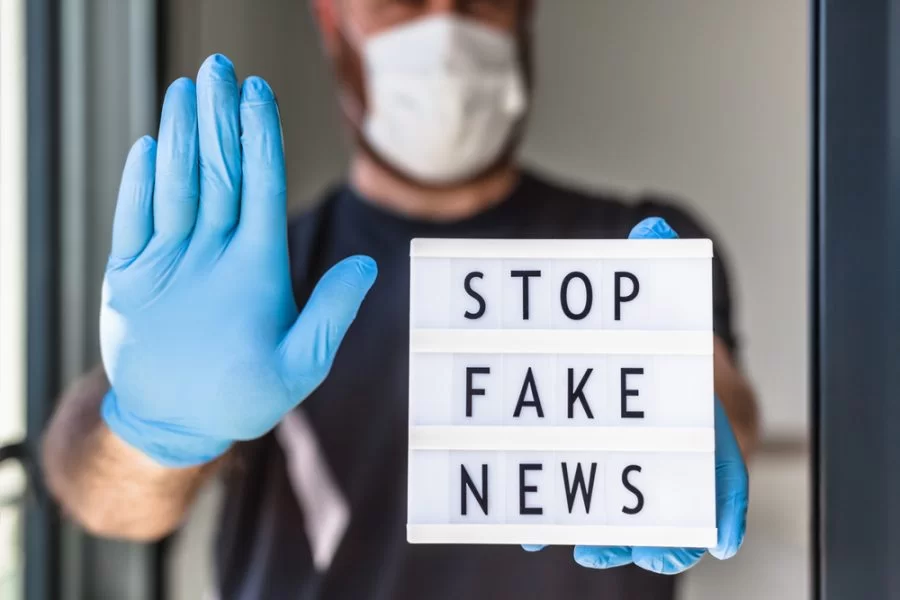

# Conclusion

In this fake news detection project, we harnessed the power of machine learning to address the pervasive issue of fake news. Using a substantial and well-structured dataset, we applied Logistic Regression, Decision Tree Classification, Random Forest Classification, and Gradient Boost Classification to distinguish between genuine and deceptive news articles. Our models achieved commendable accuracy, underscoring their potential to combat misinformation.

The importance of fake news detection cannot be overstated. Beyond preserving public trust, it has societal, political, and economic implications. Our project contributes to the ongoing efforts to safeguard the integrity of information in the digital age. Future work may explore advanced techniques to further enhance detection capabilities, ensuring the reliability of information in an era of digital information abundance.
